In [24]:
import requests
import networkx as nx
import numpy as np
import collections
from networkx.drawing.nx_agraph import graphviz_layout
from time import sleep
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.spatial as spt
from IPython.display import SVG

In [13]:
vk_user_id = 84719544 # your vk id
print(f'''1. go to this url: https://oauth.vk.com/authorize?client_id=7993002&display=page&redirect_uri=https://oauth.vk.com/blank.html&scope=friends&response_type=token&v=5.124
2. give access for savn-mipt application
3. copy access_token from redirected url
''')

# enter access token here
access_token="be49f34b857d66507329f1d0b453d053fccffc4ffcc0a3a1007fe60541bd9941b944e5f50b421e1d59dfc"

1. go to this url: https://oauth.vk.com/authorize?client_id=7993002&display=page&redirect_uri=https://oauth.vk.com/blank.html&scope=friends&response_type=token&v=5.124
2. give access for savn-mipt application
3. copy access_token from redirected url



In [14]:
# check parser
URL = "https://api.vk.com/method/friends.get?user_id={}&fields=city%2Csex%2Ceducation&v=5.124&access_token={}"
    
r = requests.get(URL.format(vk_user_id, access_token)).json()
r['response']['items'][0]

{'first_name': 'Игорь',
 'id': 12831,
 'last_name': 'Слинько',
 'can_access_closed': True,
 'is_closed': False,
 'sex': 2,
 'city': {'id': 1, 'title': 'Москва'},
 'university': 297,
 'university_name': 'МФТИ (Физтех)',
 'faculty': 2080,
 'faculty_name': 'Факультет управления и прикладной математики',
 'graduation': 2012,
 'education_form': 'Очное отделение',
 'education_status': 'Выпускник (магистр)',
 'track_code': 'b7d16d7agb4hMHH-8KBopVoYCm_5_fii1bzZWy2oiQoDZC7YYGLs1XtWTf2koW6jXMHv9nabmMSn'}

In [15]:
def get_friends_ids(user_id, access_token):
    friends_url = "https://api.vk.com/method/friends.get?user_id={}&fields=city%2Csex%2Ceducation&v=5.124&access_token={}"
    json_response = requests.get(friends_url.format(user_id, access_token)).json()
    if json_response.get('error'):
        print(json_response.get('error'))
        return list()
    return json_response[u'response']

In [16]:
graph = {}
friend_ids = get_friends_ids(vk_user_id, access_token)
for friend_id in friend_ids['items']:
    print('Processing id: ', friend_id['id'])
    sleep(0.5)
    try:
        friend_dict = {}
        friend_dict['name'] = friend_id['first_name'] + " " + friend_id['last_name']
        friend_dict['sex'] = friend_id['sex']
        try:
            friend_dict['city'] = friend_id['city']['title']
        except:
            friend_dict['city'] = "0"
        friend_dict['friends'] = [x['id'] for x in get_friends_ids(friend_id['id'], access_token)['items']]
        graph[friend_id['id']] = friend_dict
    except:
        continue
friend_ids_list = [x['id'] for x in friend_ids['items']]


Processing id:  12831
Processing id:  32174
Processing id:  72198
Processing id:  227877
Processing id:  783422
Processing id:  882963
Processing id:  1039850
Processing id:  1489911
{'error_code': 18, 'error_msg': 'User was deleted or banned', 'request_params': [{'key': 'user_id', 'value': '1489911'}, {'key': 'fields', 'value': 'city,sex,education'}, {'key': 'v', 'value': '5.124'}, {'key': 'method', 'value': 'friends.get'}, {'key': 'oauth', 'value': '1'}]}
Processing id:  1548489
Processing id:  1669791
Processing id:  1731674
Processing id:  2045169
{'error_code': 18, 'error_msg': 'User was deleted or banned', 'request_params': [{'key': 'user_id', 'value': '2045169'}, {'key': 'fields', 'value': 'city,sex,education'}, {'key': 'v', 'value': '5.124'}, {'key': 'method', 'value': 'friends.get'}, {'key': 'oauth', 'value': '1'}]}
Processing id:  2191771
Processing id:  2401496
Processing id:  3941126
Processing id:  4110471
Processing id:  4150681
{'error_code': 18, 'error_msg': 'User was d

In [17]:
G = nx.Graph(directed=False)
for i in graph:
    G.add_node(i, sex=graph[i]['sex'],
                  city=graph[i]['city'],
                  name=graph[i]['name'])
    for j in graph[i]['friends']:
        if i != j and i in friend_ids_list and j in friend_ids_list:
            G.add_edge(i, j)

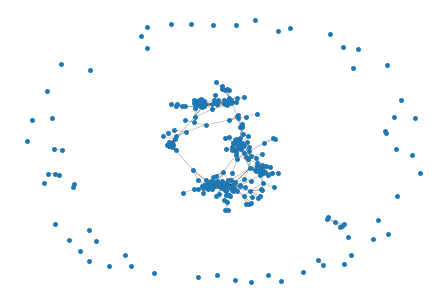

In [25]:
pos = nx.spring_layout(G)
nx.draw(G, pos, node_size=15, with_labels=False, width=0.2)

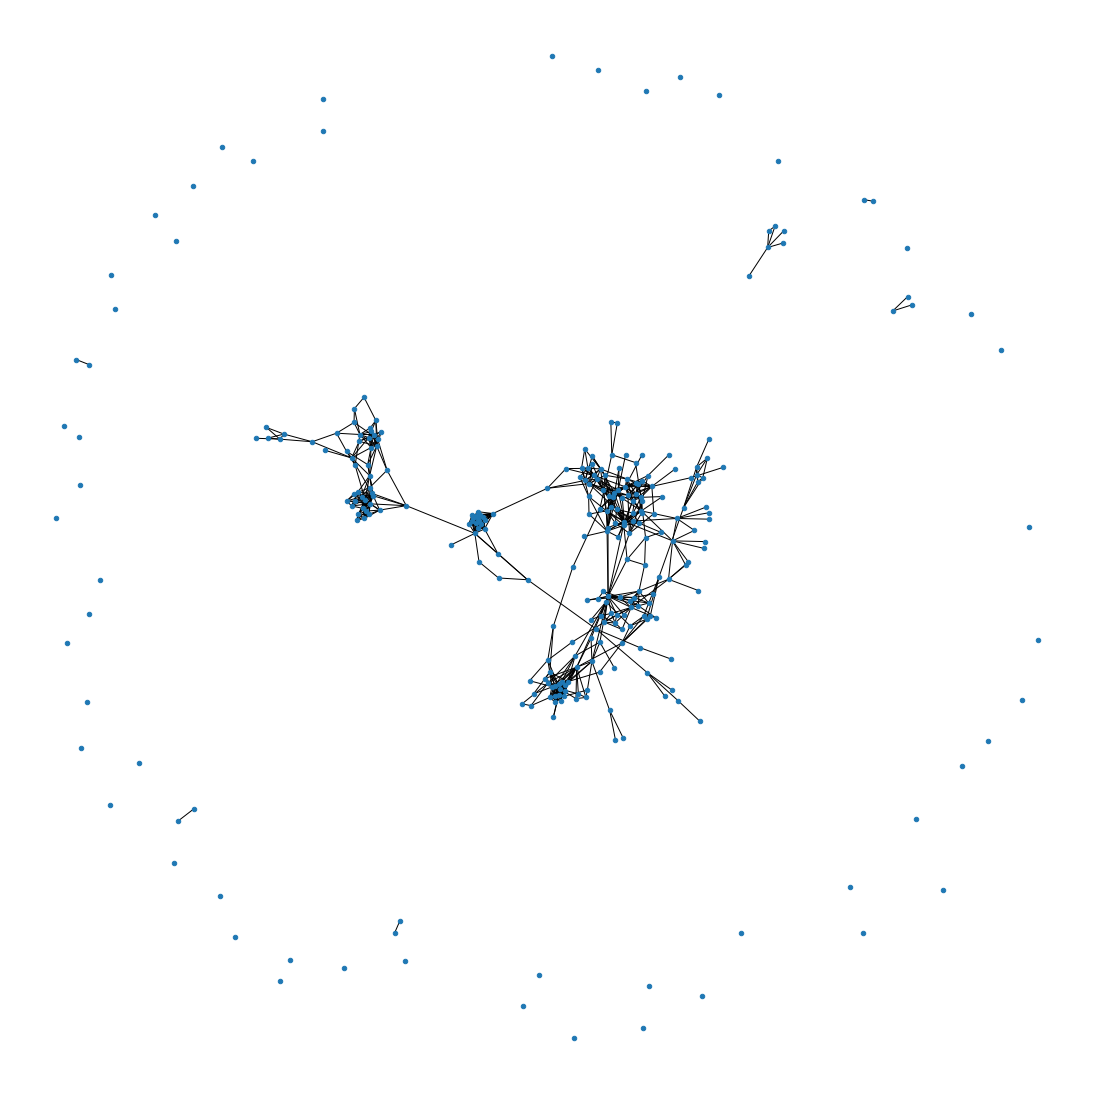

In [26]:
plt.figure(figsize=(15, 15))
pos = nx.spring_layout(G, iterations=50)
nx.draw(G, pos=pos, node_size=20, cmap=plt.cm.Blues, with_labels=False)

In [27]:
print(f"Social Network has {G.number_of_nodes()} nodes and {G.number_of_edges()} connections between each other")
print(f"Number of connected components = {nx.number_connected_components(G)}")

Social Network has 301 nodes and 750 connections between each other
Number of connected components = 59
